# 1. DATA PREPROCESSING

In [1]:
from sklearn import datasets
import numpy as np
import random

### 1.1. Load the data

In [2]:
x_csr, y = datasets.load_svmlight_file('diabetes')
x = x_csr.todense()

In [3]:
print(f'Shape of x: {x.shape}')
print(f'Shape of y: {y.shape}')

Shape of x: (768, 8)
Shape of y: (768,)


In [4]:
x = np.array(x)
y = np.array(y).reshape(768, 1)

### 1.2. Partition to training and test sets

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 34)

In [6]:
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (614, 8)
Shape of y_train: (614, 1)
Shape of X_test: (154, 8)
Shape of y_test: (154, 1)


### 1.3. Feature Scaling

Standardization

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [8]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
print(f'Test Mean = {np.mean(X_test, axis= 0)}')
print(f'Test Std = {np.std(X_test, axis= 0)}')

Test Mean = [-0.25637437  0.12176086 -0.09741854  0.03541182  0.04577823  0.00247053
  0.05911059 -0.17752461]
Test Std = [0.93213627 1.00192648 1.1591729  1.00804844 1.0617536  1.10936106
 1.19870753 0.92302966]


### 1.4. Add a dimension of all ones

In [10]:
train_ones = np.ones((X_train.shape[0], 1))
test_ones = np.ones((X_test.shape[0], 1))

In [11]:
X_train = np.concatenate((X_train, train_ones), axis = 1)
X_test = np.concatenate((X_test, test_ones), axis = 1)
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')

Shape of X_train: (614, 9)
Shape of X_test: (154, 9)


# 2. Logistic regression model

The objective function is $Q (w; X, y) = \frac{1}{n} \sum_{i=1}^n \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $. 

In [12]:
def objective(w, x, y, lam):
    n = y.shape[0]
    yxw = np.dot(y * x, w)
    ans = (np.mean( np.log( 1 + np.exp(-yxw)) + lam/2 * np.sum(w * w)))
    return ans

## Evaluate the objective func value at w

In [13]:
d = X_train.shape[1]

# for two different values of w

w1 = np.zeros((d, 1))
w2 = np.random.random((d, 1))

lam = 1E-6

In [14]:
obj1 = objective(w1, X_train, y_train, lam)
print(f"Initial objective function value at w1 : {obj1}")

Initial objective function value at w1 : 0.6931471805599453


In [15]:
obj2 = objective(w2, X_train, y_train, lam)
print(f"Initial objective function value at w2 : {obj2}")

Initial objective function value at w2 : 1.2228626940214198


# 3. Numerical Optimization 

### 3.1. Gradient descent

The gradient at $w$ is $g = - \frac{1}{n} \sum_{i=1}^n \frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$

In [16]:
def gradient(w, x, y, lam):
    n, d = x.shape
    a = np.mean( (y * x) / (1 + np.exp(np.dot(y * x, w)) ) , axis = 0)
    a = a.reshape(d, 1)
    
    g = - a + lam * w
    
    return g

In [17]:
def grad_descent(x, y, lam, stepsize, epoch=100, w = None):
    
    n, d = x.shape
    objective_vals = np.zeros(epoch)
    
    if w is None: w = np.zeros((d, 1))
        
    for i in range(epoch):
        objective_val = objective(w, x, y, lam)
        
        objective_vals[i] = objective_val
        
        print(f"Objective value at i = {i} is {objective_val}")
        
        g = gradient(w, x, y, lam)
        
        w = w - stepsize * g
        
    return w, objective_vals

Run Gradient Descent

In [18]:
lam = 1E-6
stepsize = 1.0

w, objvals_gd = grad_descent(X_train, y_train, lam, stepsize)

Objective value at i = 0 is 0.6931471805599453
Objective value at i = 1 is 0.5938477146261165
Objective value at i = 2 is 0.5550891503498607
Objective value at i = 3 is 0.5349668947159462
Objective value at i = 4 is 0.5226809937993626
Objective value at i = 5 is 0.5144621175386599
Objective value at i = 6 is 0.5086480420342216
Objective value at i = 7 is 0.5043803905161697
Objective value at i = 8 is 0.5011647558282497
Objective value at i = 9 is 0.4986936319714623
Objective value at i = 10 is 0.4967649384921111
Objective value at i = 11 is 0.4952403930362164
Objective value at i = 12 is 0.49402241641195316
Objective value at i = 13 is 0.49304046585540195
Objective value at i = 14 is 0.49224253021332404
Objective value at i = 15 is 0.4915896243456297
Objective value at i = 16 is 0.49105211132176235
Objective value at i = 17 is 0.4906071819936471
Objective value at i = 18 is 0.49023709051407854
Objective value at i = 19 is 0.4899278963801449
Objective value at i = 20 is 0.48966855324977

# 3.2. Stochastic gradient desdcent (SGD) 

Define $Q_i (w) = \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $.

The stochastic gradient at $w$ is $g_i = \frac{\partial Q_i }{ \partial w} = -\frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

In [19]:
def stochastic_objective_gradient(w, xi, yi, lam):
    d = xi.shape[0]
    
    yx = yi * xi
    
    yxw = float( np.dot(yx, w))
    
    obj = np.log(1 + np.exp( - yxw )) + (lam / 2 * np.sum(w * w))
    
    g = (-yx.T / (1 + np.exp(yxw))).reshape(9, 1) + (lam * w)
    
    return obj, g

In [20]:
def sgd(x, y, lam, stepsize, max_epoch= 100, w = None):
    
    n, d = x.shape
    objective_vals = np.zeros(max_epoch)
    
    if w is None: w = np.zeros((d, 1))
    
    for i in range(max_epoch):
        
        rand_indicies = np.arange(0, n)
        random.shuffle(rand_indicies)    # Random Shuffling
        x_rand = x[rand_indicies, :]
        y_rand = y[rand_indicies, :]
        
        objective_val = 0
        
        for j in range(n):
            xi = x_rand[j, :]
            yi = float(y_rand[j, :])
            
            obj, g = stochastic_objective_gradient(w, xi, yi, lam)
            objective_val = objective_val + obj
            w = w - stepsize * g
            
        stepsize *= 0.9
        objective_val = objective_val / n
        objective_vals[i] = objective_val
        print(f'Objective value at epoch i= {i} is {objective_val}')
        
    return w, objective_vals      

Run SGD

In [21]:
lam = 1E-6
stepsize = 0.1

w, objvals_sgd = sgd(X_train, y_train, lam, stepsize)

Objective value at epoch i= 0 is 0.5470816690467453
Objective value at epoch i= 1 is 0.5385157707667224
Objective value at epoch i= 2 is 0.5323731502737022
Objective value at epoch i= 3 is 0.5267862298373013
Objective value at epoch i= 4 is 0.5096200267317104
Objective value at epoch i= 5 is 0.525267879814227
Objective value at epoch i= 6 is 0.5229562800932692
Objective value at epoch i= 7 is 0.5180697088556621
Objective value at epoch i= 8 is 0.5141140887693609
Objective value at epoch i= 9 is 0.511837409923911
Objective value at epoch i= 10 is 0.5122011024758579
Objective value at epoch i= 11 is 0.5064972854261339
Objective value at epoch i= 12 is 0.5047505808591409
Objective value at epoch i= 13 is 0.5028727420604927
Objective value at epoch i= 14 is 0.5036493390141551
Objective value at epoch i= 15 is 0.4969402101454623
Objective value at epoch i= 16 is 0.501487066411086
Objective value at epoch i= 17 is 0.49894889824946714
Objective value at epoch i= 18 is 0.49803334962975065
Obje

# 4. Compare GD with SGD

Plot objective function values against epochs.

In [22]:
import matplotlib.pyplot as plt
from matplotlib import style

<ipython-input-23-dae6eabe1692>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  gd, = plt.plot(epochs, objvals_gd, 'g--', Linewidth = 5)
<ipython-input-23-dae6eabe1692>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  sgd, = plt.plot(epochs, objvals_sgd, '-r', Linewidth = 4)
<ipython-input-23-dae6eabe1692>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xlabel('Epochs', fontSize=25)
<ipython-input-23-dae6eabe1692>:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.ylabel('Objective Value', fontSize=25)
<ipython-input-23-dae6eabe1692>:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and su

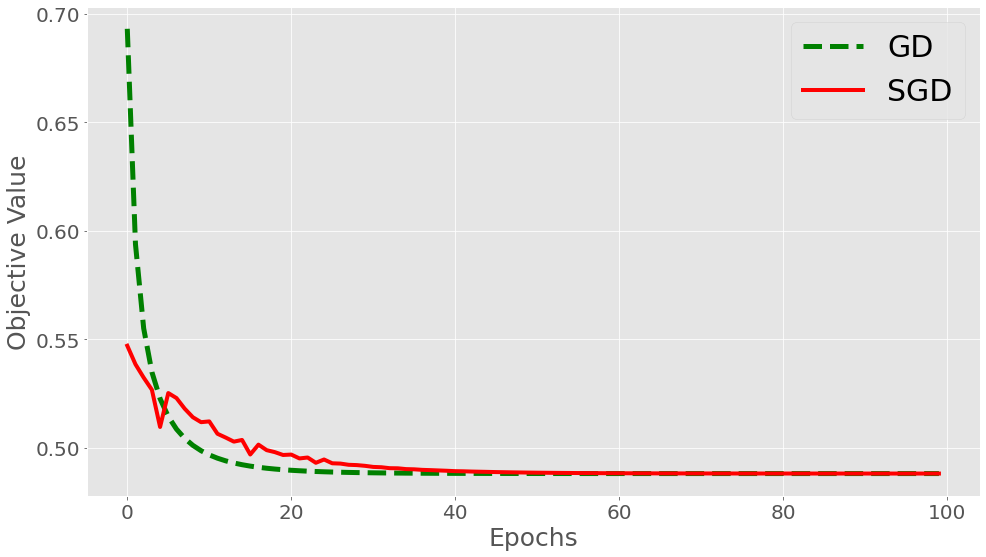

In [23]:
fig = plt.figure(figsize=(16, 9))
style.use('ggplot')

epochs = np.arange(0, 100)

gd, = plt.plot(epochs, objvals_gd, 'g--', Linewidth = 5)
sgd, = plt.plot(epochs, objvals_sgd, '-r', Linewidth = 4)

plt.xlabel('Epochs', fontSize=25)
plt.ylabel('Objective Value', fontSize=25)
plt.xticks(FontSize=20)
plt.yticks(FontSize=20)
plt.legend([gd, sgd], ['GD', 'SGD'], fontsize=30)
plt.show()

# 5. Prediction

In [24]:
f_train = np.sign(np.dot(X_train, w))
diff_train = 0.5 * (np.abs(f_train - y_train))
print(f'Training classification error is : {np.mean(diff_train)}')

f_test = np.sign(np.dot(X_test, w))
diff_test = 0.5 * (np.abs(f_test - y_test))
print(f'Test classification error is : {np.mean(diff_test)}')

Training classification error is : 0.23778501628664495
Test classification error is : 0.18831168831168832


# 6. Mini-batch SGD

Define $Q_I (w) = \frac{1}{b} \sum_{i \in I} \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $, where $I$ is a set containing $b$ indices randomly drawn from $\{ 1, \cdots , n \}$ without replacement.

The stochastic gradient at $w$ is $g_I = \frac{\partial Q_I }{ \partial w} = \frac{1}{b} \sum_{i \in I} \frac{- y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

In [25]:
def mb_stochastic_objective_gradient(w, xi, yi, lam, b):
    d = w.shape[0]
    
    yx = yi * xi
    yxw = np.dot(yx, w)
    
    obj = np.mean( np.log(1 + np.exp(-yxw)) ) + lam/2*np.sum(w*w)
    
    a = np.mean( (yx) / (1 + np.exp(yxw) ) , axis = 0)
    a = a.reshape(d, 1)
    
    g = - a + lam * w
    
    return obj, g    

### 6.2. Implement mini-batch SGD

In [26]:
def mb_sgd(x, y, lam, b, stepsize, epochs=100, w=None):
    n, d = x.shape
    
    objective_vals = np.zeros(epochs)
    
    if w is None: w = np.zeros((d, 1))
    
    for e in range(epochs):
        
        rand_indicies = np.arange(0, n)
        random.shuffle(rand_indicies)
        x_rand = x[rand_indicies, :]
        y_rand = y[rand_indicies, :]
        
        objective_val = 0
        
        for j in range(n-b):
            xi = x_rand[j:j+b, :]
            yi = y_rand[j:j+b, :]
            
            obj, g = mb_stochastic_objective_gradient(w, xi, yi, lam, b)
            objective_val += obj
            w = w - stepsize * g
        
        stepsize *= 0.9
        objective_val = objective_val / n
        objective_vals[e] = objective_val
        print(f'Objective value at epoch e= {e} is {objective_val}')
        
    return w, objective_vals

### 6.3. Run MB-SGD

In [27]:
lam = 1E-6
b8 = 8
stepsize = 0.12

w, objvals_mbsgd8 = mb_sgd(X_train, y_train, lam, b8, stepsize)

Objective value at epoch e= 0 is 0.45939536896327515
Objective value at epoch e= 1 is 0.4607796321825641
Objective value at epoch e= 2 is 0.45747854806611843
Objective value at epoch e= 3 is 0.46529148021815464
Objective value at epoch e= 4 is 0.46179954760999065
Objective value at epoch e= 5 is 0.4681617302745085
Objective value at epoch e= 6 is 0.4753318402725105
Objective value at epoch e= 7 is 0.4610158294819576
Objective value at epoch e= 8 is 0.4778824008933947
Objective value at epoch e= 9 is 0.4807792236637176
Objective value at epoch e= 10 is 0.4734808406181535
Objective value at epoch e= 11 is 0.4810614061002933
Objective value at epoch e= 12 is 0.4739073609449662
Objective value at epoch e= 13 is 0.4764879006332528
Objective value at epoch e= 14 is 0.4765250170193545
Objective value at epoch e= 15 is 0.48173670451013806
Objective value at epoch e= 16 is 0.4791295219278113
Objective value at epoch e= 17 is 0.48225656089926905
Objective value at epoch e= 18 is 0.47918701318619

In [28]:
b64 = 64
w, objvals_mbsgd64 = mb_sgd(X_train, y_train, lam, b64, stepsize)

Objective value at epoch e= 0 is 0.429643222415655
Objective value at epoch e= 1 is 0.4126912290581454
Objective value at epoch e= 2 is 0.4296748692234493
Objective value at epoch e= 3 is 0.4258311669253282
Objective value at epoch e= 4 is 0.4123517479916771
Objective value at epoch e= 5 is 0.4340129316627905
Objective value at epoch e= 6 is 0.4245847885575726
Objective value at epoch e= 7 is 0.4353665009415393
Objective value at epoch e= 8 is 0.4289202262646891
Objective value at epoch e= 9 is 0.42073183532270264
Objective value at epoch e= 10 is 0.44180897830874083
Objective value at epoch e= 11 is 0.43570915295462115
Objective value at epoch e= 12 is 0.4172657352696116
Objective value at epoch e= 13 is 0.4269950093173814
Objective value at epoch e= 14 is 0.4319726096856778
Objective value at epoch e= 15 is 0.4364803392706065
Objective value at epoch e= 16 is 0.44032730330522013
Objective value at epoch e= 17 is 0.4401677240581432
Objective value at epoch e= 18 is 0.43810346521740745

# 7. Plot  and Compare GD, SGD, and MB-SGD

<ipython-input-29-6f0bfbad6a6a>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  gd, = plt.plot(epochs, objvals_gd, 'g--', Linewidth = 5)
<ipython-input-29-6f0bfbad6a6a>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  sgd, = plt.plot(epochs, objvals_sgd, '-r', Linewidth = 5)
<ipython-input-29-6f0bfbad6a6a>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  mb_sgd8, = plt.plot(epochs, objvals_mbsgd8, 'mo', Linewidth = 5)
<ipython-input-29-6f0bfbad6a6a>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  mb_sgd64, = plt.plot(epochs, objvals_mbsgd64, 'rs', Linewidth = 5)
<ipython-input-29-6f0bfbad6a6a>:11: MatplotlibDeprecationWarning: Cas

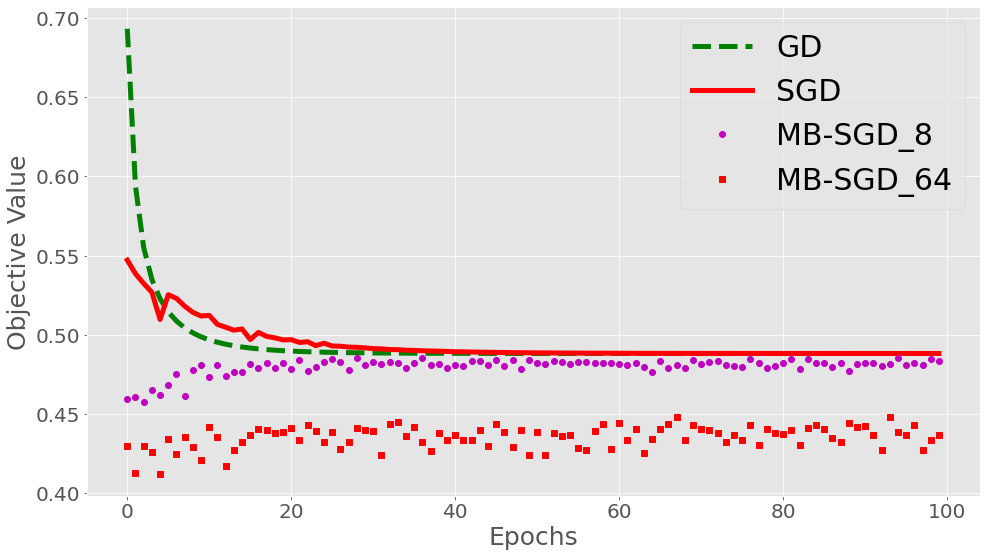

In [29]:
fig = plt.figure(figsize=(16, 9))
style.use('ggplot')

epochs = np.arange(0, 100)

gd, = plt.plot(epochs, objvals_gd, 'g--', Linewidth = 5)
sgd, = plt.plot(epochs, objvals_sgd, '-r', Linewidth = 5)
mb_sgd8, = plt.plot(epochs, objvals_mbsgd8, 'mo', Linewidth = 5)
mb_sgd64, = plt.plot(epochs, objvals_mbsgd64, 'rs', Linewidth = 5)

plt.xlabel('Epochs', fontSize=25)
plt.ylabel('Objective Value', fontSize=25)
plt.xticks(FontSize=20)
plt.yticks(FontSize=20)

plt.legend([gd, sgd, mb_sgd8, mb_sgd64], ['GD', 'SGD', 'MB-SGD_8', 'MB-SGD_64'], 
           fontsize=30)
plt.show()